In [1]:
# Import libraries
import matplotlib.pyplot as plt
import scipy.signal
from scipy.io import readsav
import numpy as np

In [2]:
# System parameters
PRF = 3300 # pulse repetition frequency [Hz] (inverse of PRI)
L_a = 4.8 # antenna length [m]
# Doppler bandwidth depends on the antenna length and satellite velocity
pwb = 2800 # processed Doppler bandwidth [Hz]
Br = 100e6 # Chirp bandwidth in range [Hz]
Fr = 1.1*Br # Sampling frequency in range [Hz]

In [9]:
# Read the sav data 
data = readsav('compl_refl_city.sav')

In [10]:
complex_refl = data["compl_refl"]
complex_refl = complex_refl.astype(np.complex128)  # The data are complex

n_rg =complex_refl.shape[1] # Nunmber of samples in range 
n_az =complex_refl.shape[0] # Nunmber of samples in azimuth 
print(n_rg)
print(n_az)

4096
4096


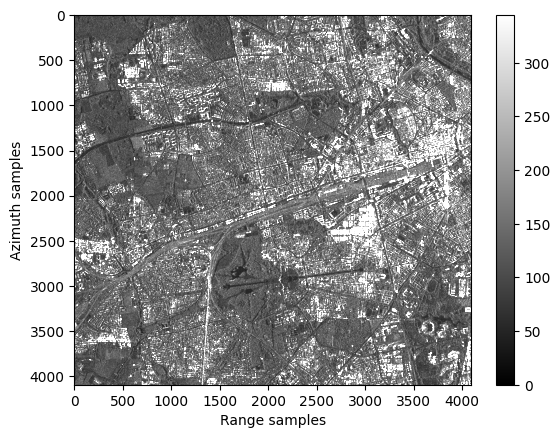

In [4]:
# Show the image
# Calibrate TerraSAR-X data by a factor -51.83 dB:

# Mean value of the amplitude
mean_value = np.mean(np.abs(complex_refl))

# Sum of the squared moduls 
energy_in = np.sum (np.abs(complex_refl)**2)

plt.figure()
plt.imshow(np.abs(complex_refl),vmin=0,vmax=2*mean_value,aspect="auto",cmap="gray")
plt.xlabel("Range samples")
plt.ylabel("Azimuth samples")
plt.colorbar()


Text(0.5, 1.0, 'Azimuth FFT')

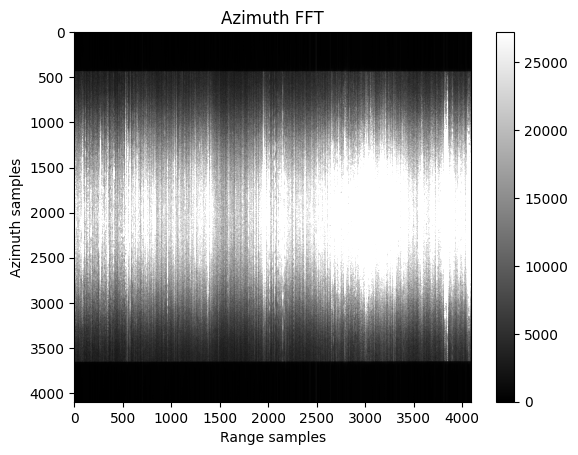

In [5]:
# Data in the azimuth frequency domain (Azimuth FFT)

s_1 = np.fft.fftshift(np.fft.fft(complex_refl, axis=0), axes=0)  # Matrix of dimension [n_az x n_rg]

# Mean value of the amplitude
mean_value_s_1 = np.mean(np.abs(s_1))

plt.figure()
plt.imshow(np.abs(s_1),vmin=0,vmax=2*mean_value_s_1,aspect="auto",cmap="gray")
plt.xlabel("Range samples")
plt.ylabel("Azimuth samples")
plt.colorbar()
plt.title("Azimuth FFT")

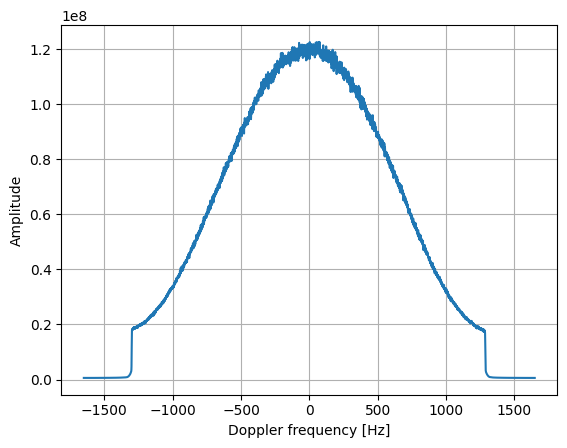

In [6]:
# Sum of the FFT of all the samples along range
s_1_all = np.sum(np.abs(s_1),axis=1)

# Azimuth frequency axis (Doppler frequency axis)
f_dopp = np.arange(-n_az / 2, n_az / 2) * PRF / n_az  # Array of dimension (n_az,)


plt.figure()
plt.plot(f_dopp,s_1_all)
plt.xlabel("Doppler frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()


Text(0.5, 1.0, 'Range FFT')

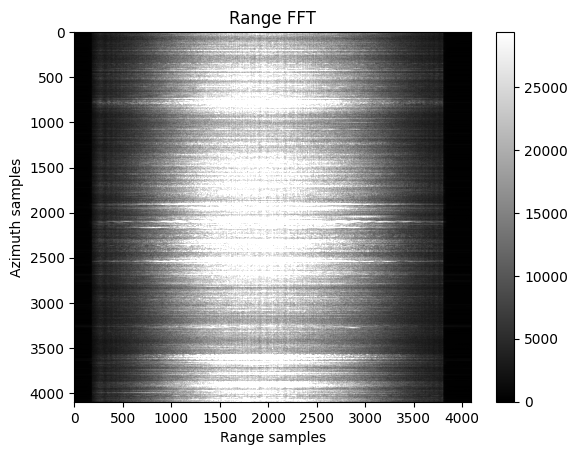

In [7]:
# Data in the range frequency domain (Range FFT)

s_2 = np.fft.fftshift(np.fft.fft(complex_refl, axis=1), axes=1)  # Matrix of dimension [n_az x n_rg]

# Mean value of the amplitude
mean_value_s_2 = np.mean(np.abs(s_2))

plt.figure()
plt.imshow(np.abs(s_2),vmin=0,vmax=2*mean_value_s_2,aspect="auto",cmap="gray")
plt.xlabel("Range samples")
plt.ylabel("Azimuth samples")
plt.colorbar()
plt.title("Range FFT")

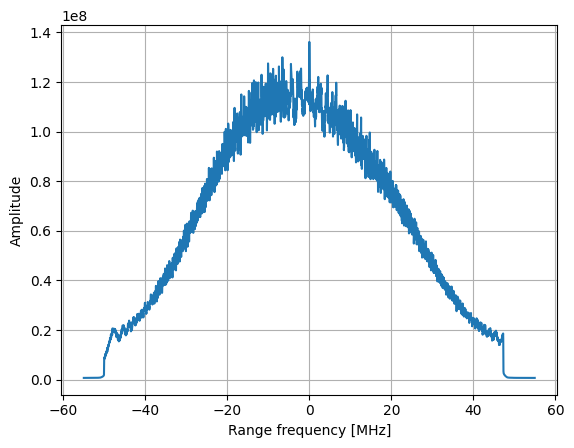

In [8]:
# Sum of the FFT of all the pulses along azimuth
s_2_all = np.sum(np.abs(s_2),axis=0)

# Range frequency axis
f_rg = np.arange(-n_rg / 2, n_rg / 2) * Fr / n_rg  # Array of dimension (n_rg,)


plt.figure()
plt.plot(f_rg*1e-6,s_2_all)
plt.xlabel("Range frequency [MHz]")
plt.ylabel("Amplitude")
plt.grid()

# Part-1 Reduce the resolution 

Text(0.5, 1.0, 'Example of 2000 Hz of pwb')

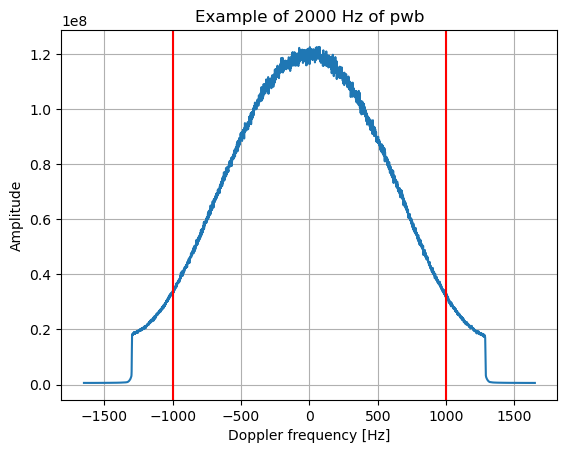

In [10]:
# Next step--> Reduce the resolution in range and in azimuth by processing a smaller amount of bandwidth

# Start with only the resolution in azimuth and keep fixed the resolution in range by considering a processed Doppler bandwidth
# smaller than pbw = 2800 Hz (for example, 2000 Hz, 1500 Hz, 1000 Hz etc)

# Sum of the FFT of all the samples along range
s_1_all = np.sum(np.abs(s_1),axis=1)

# Azimuth frequency axis
f_dopp = np.arange(-n_az / 2, n_az / 2) * PRF / n_az  # Array of dimension (n_az,)


plt.figure()
plt.plot(f_dopp,s_1_all)
plt.axvline(x=2000/2,color="red")
plt.axvline(x=-2000/2,color="red")
plt.xlabel("Doppler frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()
plt.title("Example of 2000 Hz of pwb")


# Normalize the data that the backscatter return is the same (normalize the data that the energy is the same for both images
# the orginal image and the image with the reduced resolution)

# SHow the new image and check visually if the resolution of the data is worst compared to the original image

Text(0.5, 1.0, 'Example of 80 MHz of bandwidth in range')

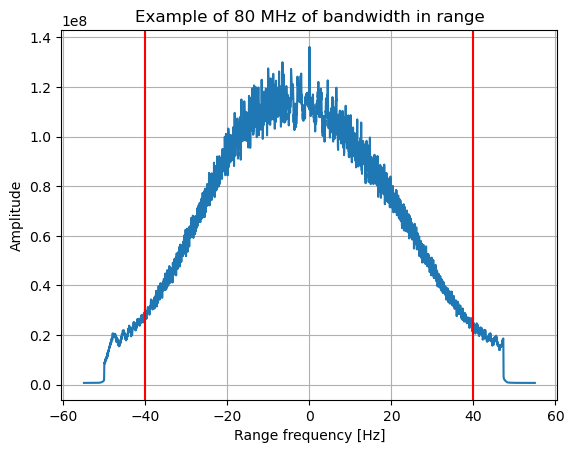

In [38]:
# Repeat the same analysis for the case of the resolution in range by processing for example 80 MHz, 60 MHz, 40 MHz
#by keeping fixed the resolution in azimuth 


# Sum of the FFT of all the pulses along azimuth
s_2_all = np.sum(np.abs(s_2),axis=0)

# Range frequency axis
f_rg = np.arange(-n_rg / 2, n_rg / 2) * Fr / n_rg  # Array of dimension (n_rg,)


plt.figure()
plt.plot(f_rg*1e-6,s_2_all)
plt.axvline(x=80/2,color="red")
plt.axvline(x=-80/2,color="red")
plt.xlabel("Range frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()
plt.title("Example of 80 MHz of bandwidth in range")



# Normalize the data that the backscatter return is the same (normalize the data that the energy is the same for both images
# the orginal image and the image with the reduced resolution)

# SHow the new image and check visually if the resolution of the data is worst compared to the original image

# Add noise to the data

In [11]:
# Generation of complex noise samples 
# Zero mean value and a given variance (i.e., noise power)

# Focused data power
P_data_dB = 10*np.log10(np.mean(np.abs(complex_refl)**2))  # [dB]

print(P_data_dB)

# SNR values to be considered
SNR_dB = [40,30,5] # dB

# Noise power (or variance)
P_noise = 10**(P_data_dB/10)/(10**(SNR_dB[2]/10))

# Generation of the noise sample
noise = np.random.normal(0, np.sqrt(P_noise / 2), size=(n_az, n_rg)) + 1j * np.random.normal(0, np.sqrt(P_noise / 2), size=(n_az, n_rg))

# Check the variance 
var_estim = np.mean(np.abs(noise)**2)

print(var_estim)
print(P_noise)



50.07771951362899
32180.73783989751
32193.77847573852


In [69]:
# Add the complex noise to the complex data and show the image